In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Local Modules
from utilities import load_json
import pkg_1a
import pkg_1b

from augmentation import Augmenter
from preprocessing import get_dataset
from utilities import save_npy_v2, show_dataset, get_timestamp, get_custom_cmap
import statistics

In [3]:
PKG_1_PARAMS = load_json("pkg_1_config.json")

In [4]:
OUTPUT_PATH = Path.cwd() / (PKG_1_PARAMS["out_dir"] + "/" + get_timestamp())
(Path(OUTPUT_PATH)).mkdir()
(Path(OUTPUT_PATH) / "images").mkdir()
(Path(OUTPUT_PATH) / "npy_images").mkdir()
(Path(OUTPUT_PATH) / "npy_annots").mkdir()
(Path(OUTPUT_PATH) / "datasets").mkdir()

In [5]:
# pkg_1a
img_paths, ann_paths = pkg_1a.main(PKG_1_PARAMS)
# pkg_1b
image_db, annot_db = pkg_1b.main(PKG_1_PARAMS)

100%|██████████| 310/310 [01:39<00:00,  3.12it/s]


In [8]:
def gen_aug_data(image_db, annot_db, PARAMS, out_dir=OUTPUT_PATH):  
    GEN_CONFIG = PARAMS["aug_gen"]
     
    class_selected = [f"class_{i}" for i in GEN_CONFIG["class_to_gen"]]

    img_sel = []
    ann_sel = []  

    # Add class weightage here
    for img_class in class_selected:
        img_files = image_db[img_class]
        ann_files = annot_db[img_class]

        img_sel += img_files
        ann_sel += ann_files

    dataset_size = GEN_CONFIG["dataset_size"]

    img_chunks = [img_sel[x:x+dataset_size * PARAMS["num_exp"]] for x in range(0, len(img_sel), dataset_size * PARAMS["num_exp"])]

    ann_chunks = [ann_sel[x:x+dataset_size] for x in range(0, len(ann_sel), dataset_size)]  

    index_init = 0
    for i in range(len(img_chunks)):

        num_gen = int(GEN_CONFIG["gen_scale"] * len(ann_chunks[i]))
        aug_obj = Augmenter(PARAMS, img_chunks[i], ann_chunks[i], out_dir)

        aug_img, aug_ann = aug_obj.generate_aug(num_gen=num_gen, r_state=GEN_CONFIG["r_state"], write_img=True, start_index = index_init)

        index_init += num_gen

        save_npy_v2(aug_img, Path(out_dir)/f"datasets/images_{i+1}")
        save_npy_v2(aug_ann, Path(out_dir)/f"datasets/annots_{i+1}")

    return aug_img, aug_ann

In [9]:
aug_img, aug_ann = gen_aug_data(image_db, annot_db, PKG_1_PARAMS)

100%|██████████| 27/27 [00:04<00:00,  5.80it/s]


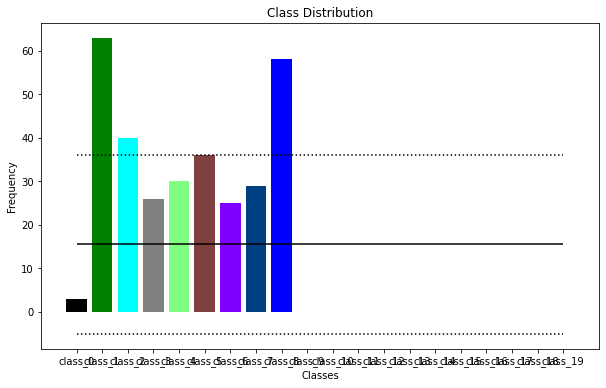

In [10]:
statistics.class_dist_from_db(annot_db)

In [ ]:
# img_sel = image_db["class_1"]
# ann_sel = annot_db["class_1"]

In [ ]:
# aug_obj = augmentation.Augmenter(PKG_1_PARAMS, img_sel, ann_sel, out_dir= OUTPUT_PATH)

In [ ]:
# aug_img, aug_ann = aug_obj.generate_aug(num_gen=10, write_img=True)

In [ ]:
print(f"Img array shape: {aug_img.shape}")
print(f"Ann array shape: {aug_ann.shape}")

In [ ]:
show_dataset(aug_img, aug_ann, 10, num_exp=3, num_class=10)

In [ ]:
statistics.class_dist_from_db(annot_db)

In [ ]:
# def main(PKG_1_PARAMS=None):
#     # "C:/Users/josep/Documents/work/crate_classifier_dev_v2/images/factory_images_annotated"
#     #"C:/Users/josep/Documents/work/crate_classifier_dev_v2/images/img_3_sample_train"
#     if PKG_1_PARAMS is None:
#         PKG_1_PARAMS = {
#             "src_dir": "C:/Users/josep/Documents/work/crate_classifier_dev_v2/images/img_3_sample_train",
#             "img_src_shape": (964, 1292),
#             "net_in_shape": (128, 128),
#             "num_exp": 3,
#             "num_classes": 20,
#             "bg_class_id": [0, 9, 10],
#             "cls_thres": 0.85,
#             }

#     # pkg_1a
#     img_paths, ann_paths = pkg_1a.main(PKG_1_PARAMS)
#     # pkg_1b
#     image_db, annot_db = sort_by_class(img_paths, ann_paths, PKG_1_PARAMS)

#     return image_db, annot_db

In [ ]:
# if __name__ == "__main__":
#     image_db, annot_db = main()
#     print("img_paths['class_1'] sample:\n", image_db["class_1"][:4])
#     print("ann_paths['class_1'] sample:\n", annot_db["class_1"][:4])